## Step 1. Learning the structure of Bayesian networks
In this notebook we will try a simple Bayesian network inference algorithm and review concepts of consensus structures and evaluation. We will do this using the [pgmpy python suite](https://pgmpy.org/index.html) suite. This notebook assumes that the code and data are already downloaded. We will first import pgmpy into the Jupyter environment. The notebook was tested with pgmpy version 0.1.19.

In [2]:
import pgmpy
import pandas as pd

/mnt/ws/home/sroy/old-local-home/.conda/envs/pgmpy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The structure learning will use a simple Greedy Hill climbing search algorithm implemented in the `HillClimbSearch` module using the `K2Score`. We will next import these two modules.

In [3]:
from pgmpy.estimators import HillClimbSearch, K2Score

### Loading the data

Next we will load the data. This dataset is from a single cell RNA-seq experiment in yeast from [this paper](https://doi.org/10.1371/journal.pbio.2004050). This dataset measures gene expression of ~6k genes in 163 cells. We have cleaned up and reduced the dataset to ~40 genes across 163 cells. We binarized the data, where 1 means the gene is ON and 0 means the gene is OFF. We have further subsampled the data into 50 subsamples. We will first load in one subsample, `dataset0.txt`. There are 50 such subsamples that we already generated for you. 

In [4]:
ss=pd.read_csv("../data/gasch_n100_subsamples/dataset0.txt");

Let's look at the contents of this file.

In [5]:
ss.head()

,YAL003W,YBL005W,YBL027W,YBR083W,YDL060W,YDL229W,YDR261C,YEL009C,YEL011W,YEL040W,...,YNL068C,YNL178W,YNL192W,YOL052C-A,YOL151W,YOR028C,YOR095C,YOR273C,YOR369C,YPL061W
0,1,1,1,0,0,1,0,1,0,1,...,1,1,0,1,1,0,0,1,1,1
1,1,1,1,0,0,1,1,1,0,0,...,1,1,0,1,1,0,0,1,1,1
2,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3,1,0,1,0,0,1,0,1,1,0,...,0,1,1,1,1,0,0,1,1,1
4,1,1,1,0,0,1,0,1,1,0,...,0,1,1,1,1,1,0,1,1,1


This has gene names on the first row and the number of rows correspond to the number of samples and the number of columns are the nodes/genes/random variables in our Bayesian network.

### Learning one Bayesian network

In [6]:
scoring_method = K2Score(data=ss) # this will set the dataset of the score
est = HillClimbSearch(data=ss) # this will set the dataset for the search

Now we are ready to learn the Bayesian network. We will let a node to have max 4 parents and will set max iterations of inference to be 10000. The output `estimated_model` is our Bayesian network.

In [8]:
estimated_model = est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)) 

  1%|█▊                                                                                                                                                       | 115/10000 [00:38<54:34,  3.02it/s]


Let's visualize what we learned. We will use the `networkx` and `matplotlib` packages for this.

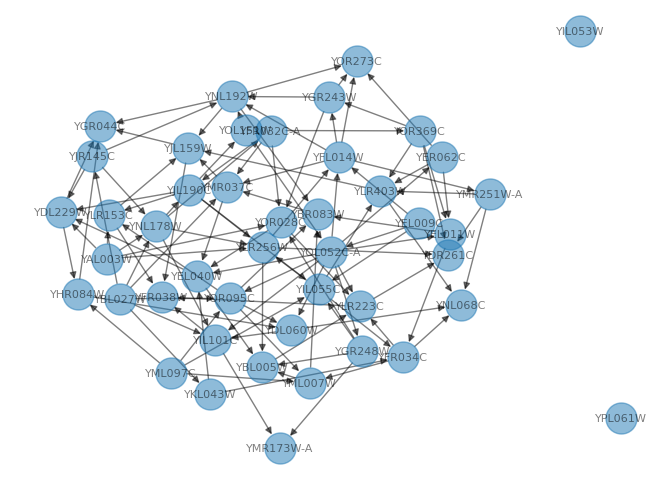

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
pos=nx.nx_agraph.graphviz_layout(estimated_model);
nx.draw(estimated_model,pos=pos,with_labels=True,node_size=500,font_size=8,alpha=0.5);

Save the network to an output path. Here we will put it in the `bnets` folder in the current path. Note that Bayesian networks learned from pgmpy are all based on `networkx` and many of the functionalities are inherited in the Bayesian networks we learn.

In [12]:
from pathlib import Path
Path('bnets').mkdir(parents=True, exist_ok=True)

nx.write_edgelist(estimated_model,'bnets/net0.txt', data=False, delimiter='\t')

### Step 2. Evaluation of the inferred network

The "imperfect" ground truth for these networks are available at `<insert url>`. Assume these are in  `data/networks/groundtruth_n100.txt`. We will use the `compareGraphs` program to see how well we learned the network. In particular execute your version of `compareGraphs` and report the precision, recall, and F-score.
    
`./compareGraphs data/networks/groundtruth_n100.txt bnets/net0.txt`

### Step 3. Consensus graph creation

We will generate a consensus graph by applying the Bayesian network learning process to different number of subsamples. We will write these networks into the same `bnets` folder. The code below is for generating 5 networks.

In [1]:
for id in range(0,5):
    ss=pd.read_csv("../data/gasch_n100_subsamples/dataset"+str(id)+".txt")
    scoring_method = K2Score(data=ss) 
    est = HillClimbSearch(data=ss)
    model1=est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)) 
    nx.write_edgelist(model1,'bnets/net'+str(id)+'.txt', data=False, delimiter='\t')  
    print('Done with dataset' + str(id) + '\n')

NameError: name 'pd' is not defined

Once we have generated these networks, we can create a consensus using your `makeConsensus` code written in problem 4.